In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from palettable.colorbrewer.qualitative import Set1_4
import seaborn as sns
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)

In [3]:
df=pd.read_excel(r"/home/tania/Documents/skill_development/seb/alerts.xlsx")


# Data Exploratory analysis


In [4]:
df.head()

,Unnamed: 0,intID,AlertType,AlertState,DateCreated,DateClosed,CaseOpen,CaseClosed,CaseReported,CaseState,PEP,CusRiskCategory,Type,IndustryCode
0,1489.0,1489,New Destinations with high turnover,Data Created,2014-04-25 00:00:00.000,NaN,2014-05-12 09:07:39.000,2014-05-12 10:00:59.627,NaN,Closed,N,Lower Risk,pb,NaN
1,1490.0,1490,New Destinations with high turnover,Data Created,2014-04-25 00:00:00.000,NaN,2014-05-12 09:13:17.000,2014-05-12 09:29:29.790,NaN,Closed,N,Medium Risk,pb,NaN
2,1491.0,1491,New Destinations with high turnover,Data Created,2014-04-25 00:00:00.000,NaN,2014-05-12 09:07:39.000,2014-05-12 10:00:59.627,NaN,Closed,N,Lower Risk,pb,NaN
3,1492.0,1492,New Destinations with high turnover,Data Created,2014-04-29 00:00:00.000,NaN,2014-05-12 09:07:39.000,2014-05-12 10:00:59.627,NaN,Closed,N,Lower Risk,pb,NaN
4,1493.0,1493,New Destinations with high turnover,Data Created,2014-04-29 00:00:00.000,NaN,2014-05-12 09:07:39.000,2014-05-12 10:00:59.627,NaN,Closed,N,Medium Risk,pb,NaN


In [5]:
df.tail()

,Unnamed: 0,intID,AlertType,AlertState,DateCreated,DateClosed,CaseOpen,CaseClosed,CaseReported,CaseState,PEP,CusRiskCategory,Type,IndustryCode
10172,3924.0,3924,New Destinations with high turnover,Closed - Not Suspicious,2017-12-19 00:00:00.000,2017-12-21 14:48:37.117,NaN,NaN,NaN,NaN,N,Medium Risk,pb,NaN
10173,21411.0,183371,Unusual behaviour,Closed - Not Suspicious,2021-08-18 00:00:00.000,2021-08-20 11:13:59.803,NaN,NaN,NaN,NaN,NaN,Higher Risk,lcfi,28110.0
10174,15707.0,17513,Credit Cards,Closed - Not Suspicious,2017-01-06 00:00:00.000,2017-01-09 18:50:33.967,NaN,NaN,NaN,NaN,NaN,Medium Risk,lcfi,NaN
10175,2368.0,2368,New Destinations with high turnover,Closed - Not Suspicious,2015-08-09 00:00:00.000,2015-08-10 07:30:22.187,NaN,NaN,NaN,NaN,N,Lower Risk,pb,NaN
10176,11780.0,3590,Check Countries List,Closed - Not Suspicious,2014-12-04 00:00:00.000,2015-01-23 13:44:32.720,NaN,NaN,NaN,NaN,NaN,Higher Risk,lcfi,NaN


In [6]:
df.shape

(10177, 14)

In [7]:
duplicated_values=df[df.duplicated()]
duplicated_values
#no duplicated values

,Unnamed: 0,intID,AlertType,AlertState,DateCreated,DateClosed,CaseOpen,CaseClosed,CaseReported,CaseState,PEP,CusRiskCategory,Type,IndustryCode


In [8]:
df.info()
#data set have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10177 entries, 0 to 10176
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10177 non-null  float64
 1   intID            10177 non-null  int64  
 2   AlertType        10177 non-null  object 
 3   AlertState       10177 non-null  object 
 4   DateCreated      10177 non-null  object 
 5   DateClosed       9916 non-null   object 
 6   CaseOpen         256 non-null    object 
 7   CaseClosed       188 non-null    object 
 8   CaseReported     68 non-null     object 
 9   CaseState        256 non-null    object 
 10  PEP              2902 non-null   object 
 11  CusRiskCategory  10123 non-null  object 
 12  Type             10177 non-null  object 
 13  IndustryCode     2211 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
df['Type'].value_counts()

lcfi    6337
pb      3840
Name: Type, dtype: int64

lcfi: 6337
pb: 3840
Customer distribution 1: 1.65
 
Type
lcfi    62.267859
pb      37.732141
Name: Type, dtype: float64


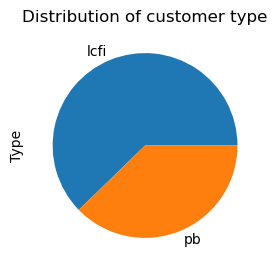

In [10]:
#print('Target distribution "1" и "0" in column "Type", legal and fraudulent transactions, respectively, pieces')
target_count = df['Type'].value_counts()
print('lcfi:', target_count[0])
print('pb:', target_count[1])
print('Customer distribution', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
#print('Target distribution "1" и "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Type')['Type'].count()/df['Type'].count())*100)


pylab.rcParams['figure.figsize'] = (4, 3)
target_count.plot(kind='pie', title='Distribution of customer type');
#Customer portfolio is only slightly imbalanced

In [11]:
target_count = df['CusRiskCategory'].value_counts()
print(target_count)
print("Sum:",target_count.sum())
#pylab.rcParams['figure.figsize'] = (4, 3)
#target_count.plot(kind='pie', title='Distribution of risk type');

Medium Risk      6986
Lower Risk       1326
Higher Risk      1183
Not Specified     628
Name: CusRiskCategory, dtype: int64
Sum: 10123


<AxesSubplot:title={'center':'Percentage of risk holders'}, ylabel='CusRiskCategory'>

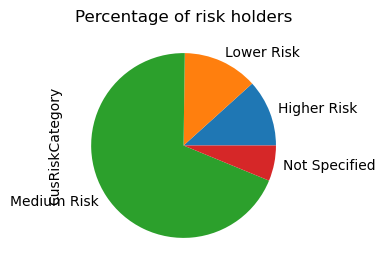

In [12]:
target_count_per=(df.groupby('CusRiskCategory')['CusRiskCategory'].count()/df['CusRiskCategory'].count())*100
target_count_per.plot(kind='pie',title='Percentage of risk holders')
#Customer portfolio is dominated by Medium risk account holders

In [13]:
df=df[["intID","AlertType","AlertState","CusRiskCategory","Type","IndustryCode"]]

In [14]:
df['Type'].value_counts()

lcfi    6337
pb      3840
Name: Type, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10177 entries, 0 to 10176
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   intID            10177 non-null  int64  
 1   AlertType        10177 non-null  object 
 2   AlertState       10177 non-null  object 
 3   CusRiskCategory  10123 non-null  object 
 4   Type             10177 non-null  object 
 5   IndustryCode     2211 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 477.2+ KB


/home/tania/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/tania/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


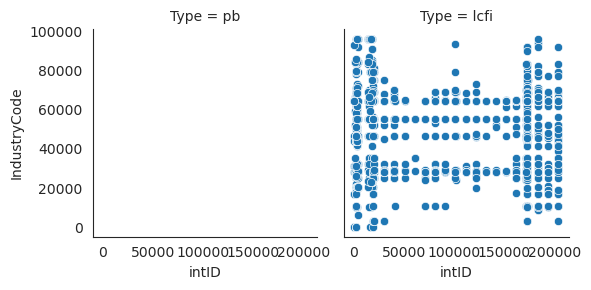

In [16]:
#check dependence of data on intID and Industry Code
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=df, col='Type')
facet_grid.map(sns.scatterplot, 'intID', 'IndustryCode', palette='Paired_r')
plt.xlabel('intID')
plt.ylabel('IndustryCode')
plt.show()
#intID and Industry Code are only important columns when the Customer is an LCFI